# Miscellaneos experiemnts
A place to try stuff out...

In [2]:
import sys
sys.path += ['../Src']

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## Ensuring dataframes have identical gene sets

In [ ]:
def read_pair_of_expressions_and_intersect(file_1, file_2):
    """Read expression data from both files returning a pair of dataframes having only genes which
    are present in both files"""
    df_1 = pd.read_csv(file_1, sep='\t', index_col=0)
    df_2 = pd.read_csv(file_2, sep='\t', index_col=0)
    
    genes_1 = set(df_1.index)
    genes_2 = set(df_2.index)
    intersection_genes = genes_1.intersection(genes_2)
    
    intersection_df = pd.DataFrame()
    intersection_df['GeneENSG'] = list(intersection_genes)
    intersection_df.set_index('GeneENSG', inplace=True)
    
    df_1_pruned = pd.merge(df_1, intersection_df, how='inner', on='GeneENSG')
    df_2_pruned = pd.merge(df_2, intersection_df, how='inner', on='GeneENSG')
    df_1_pruned.sort_index(inplace=True)
    df_2_pruned.sort_index(inplace=True)
    
    print(len(genes_1), len(genes_2), len(df_1_pruned))
    
    assert len(df_1_pruned) == len(df_2_pruned)
    assert all(df_1_pruned.index.values == df_2_pruned.index.values)
    
    return df_1_pruned, df_2_pruned

In [ ]:
expression_filename_1 = '../Data/AOCS_Protein/AOCS_Protein_Expression.tsv'
expression_filename_2 = '../Data/TCGA_OV_VST/TCGA_OV_VST_Expression.tsv'

df_1, df_2 = read_pair_of_expressions_and_intersect(expression_filename_1, expression_filename_2)

In [ ]:
df_2

## Computing H from W and X

In [ ]:
from sklearn.linear_model import LinearRegression
from factorizer_wrappers import ICA_Factorizer

In [ ]:
X = np.random.randn(50, 10) + 1.0

In [ ]:
facto = ICA_Factorizer(n_components=3array([1,2,3,4,5,6]),tol=0.01)
facto.fit(X)

In [ ]:
W = facto.get_W()
W.shape

In [ ]:
H = facto.get_H()
H.shape

In [ ]:
np.linalg.pinv(W).shape

In [ ]:
H_by_pinv = np.dot(np.linalg.pinv(W), X)

In [ ]:
H_by_pinv

In [ ]:
H

# Bar plots

In [19]:
n = 6
data = np.random.randn(3, n)

<BarContainer object of 6 artists>

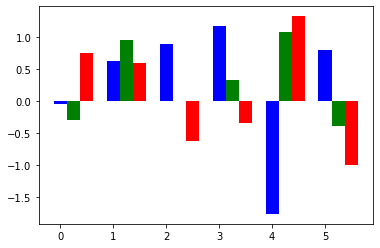

In [20]:
X = np.arange(n)
plt.bar(X + 0.00, data[0], color = 'b', width = 0.25)
plt.bar(X + 0.25, data[1], color = 'g', width = 0.25)
plt.bar(X + 0.50, data[2], color = 'r', width = 0.25)